In [32]:
import os
from joblib import Parallel, delayed
import time
import numpy as np
import pickle
import pylab as pl
import pandas as pd

# import jupyternotify
import subprocess
import concurrent.futures
import shutil

In [69]:
regions = ['us-central1-a', 'europe-west3-c', 'asia-south1-c']

In [70]:
for i in [0,1,2]:
    

    cmd = 'gcloud compute instances create flwr-'+f"{i:03}"+' \
    --project=ucr-ursa-major-lesani-lab \
    --zone='+regions[i]+' \
    --machine-type=e2-medium \
    --network-interface=network-tier=PREMIUM,stack-type=IPV4_ONLY,subnet=default \
    --maintenance-policy=MIGRATE \
    --provisioning-model=STANDARD \
    --service-account=961693926925-compute@developer.gserviceaccount.com \
    --scopes=https://www.googleapis.com/auth/devstorage.read_only,https://www.googleapis.com/auth/logging.write,https://www.googleapis.com/auth/monitoring.write,https://www.googleapis.com/auth/service.management.readonly,https://www.googleapis.com/auth/servicecontrol,https://www.googleapis.com/auth/trace.append \
    --create-disk=auto-delete=yes,boot=yes,device-name=instance-20240829-120659,image=projects/debian-cloud/global/images/debian-12-bookworm-v20240815,mode=rw,size=30,type=pd-balanced \
    --no-shielded-secure-boot \
    --shielded-vtpm \
    --shielded-integrity-monitoring \
    --labels=goog-ec-src=vm_add-gcloud \
    --reservation-affinity=any'
    
    os.system(cmd)

Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-central1-a/instances/flwr-000].
 - Disk size: '30 GB' is larger than image size: '10 GB'. You might need to resize the root repartition manually if the operating system does not support automatic resizing. See https://cloud.google.com/compute/docs/disks/add-persistent-disk#resize_pd for details.



NAME      ZONE           MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP    EXTERNAL_IP    STATUS
flwr-000  us-central1-a  e2-medium                  10.128.15.198  35.184.230.35  RUNNING


Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/europe-west3-c/instances/flwr-001].
 - Disk size: '30 GB' is larger than image size: '10 GB'. You might need to resize the root repartition manually if the operating system does not support automatic resizing. See https://cloud.google.com/compute/docs/disks/add-persistent-disk#resize_pd for details.



NAME      ZONE            MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP     STATUS
flwr-001  europe-west3-c  e2-medium                  10.156.0.4   34.159.236.249  RUNNING


Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/asia-south1-c/instances/flwr-002].
 - Disk size: '30 GB' is larger than image size: '10 GB'. You might need to resize the root repartition manually if the operating system does not support automatic resizing. See https://cloud.google.com/compute/docs/disks/add-persistent-disk#resize_pd for details.



NAME      ZONE           MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP    STATUS
flwr-002  asia-south1-c  e2-medium                  10.160.0.19  34.47.177.160  RUNNING


In [71]:
os.system('git add .; git commit -m "fc"; git push origin')

[main 36207f16] fc
 4 files changed, 62989 insertions(+), 63220 deletions(-)


To github.com:tejas-shivanand-mane/flower.git
   5f751411..36207f16  main -> main


0

In [72]:
def initialize(i):
    command = 'gcloud compute ssh --zone "'+regions[i]+'" "flwr-'+f"{i:03}"+'" --project "ucr-ursa-major-lesani-lab" --command "sudo apt -y install git; git clone https://github.com/tejas-shivanand-mane/flower.git;cd flower"'
    os.system(command)

In [73]:
def git_pull(i):
    command = 'gcloud compute ssh --zone "'+regions[i]+'" "flwr-'+f"{i:03}"+'" --project "ucr-ursa-major-lesani-lab" --command "cd flower; git pull;"'
    os.system(command)

In [74]:
def setup(i):
    command = 'gcloud compute ssh --zone "'+regions[i]+'" "flwr-'+f"{i:03}"+'" --project "ucr-ursa-major-lesani-lab" --command "cd flower; sudo sh setup.sh"'
    os.system(command)

In [75]:
def clean(i):
    command = 'gcloud compute ssh --zone "us-central1-a" "flwr-'+f"{i:03}"+'" --project "ucr-ursa-major-lesani-lab" --command "sudo rm -r flower"'
    os.system(command)

In [8]:
time.sleep(45)

In [76]:
results = Parallel(n_jobs=60)(delayed(initialize)(i) for i in range(3))

Reading package lists...


Building dependency tree...
Reading state information...
Reading package lists...

The following additional packages will be installed:
  git-man liberror-perl patch
Suggested packages:
  git-daemon-run | git-daemon-sysvinit git-doc git-email git-gui gitk gitweb
  git-cvs git-mediawiki git-svn ed diffutils-doc
The following NEW packages will be installed:
  git git-man liberror-perl patch
0 upgraded, 4 newly installed, 0 to remove and 0 not upgraded.
Need to get 9377 kB of archives.
After this operation, 48.0 MB of additional disk space will be used.
Get:1 file:/etc/apt/mirrors/debian.list Mirrorlist [30 B]
Get:2 https://deb.debian.org/debian bookworm/main amd64 liberror-perl all 0.17029-2 [29.0 kB]
Get:3 https://deb.debian.org/debian bookworm/main amd64 git-man all 1:2.39.2-1.1 [2049 kB]
Get:4 https://deb.debian.org/debian bookworm/main amd64 git amd64 1:2.39.2-1.1 [7171 kB]

Building dependency tree...Get:5 https://deb.debian.org/debian bookworm/main amd64 patch amd64 2.7.6-7 [128 kB]

Reading state information...
The following additional packages will be installed

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Fetched 9377 kB in 1s (11.7 MB/s)
Selecting previously unselected package liberror-perl.


debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 




Fetched 9377 kB in 0s (50.0 MB/s)
Selecting previously unselected package liberror-perl.
(Reading database ... 69231 files and directories currently installed.)
Preparing to unpack .../liberror-perl_0.17029-2_all.deb ...
Unpacking liberror-perl (0.17029-2) ...
(Reading database ... 69231 files and directories currently installed.)
Preparing to unpack .../liberror-perl_0.17029-2_all.deb ...
Unpacking liberror-perl (0.17029-2) ...
Selecting previously unselected package git-man.
Preparing to unpack .../git-man_1%3a2.39.2-1.1_all.deb ...
Unpacking git-man (1:2.39.2-1.1) ...
Selecting previously unselected package git-man.
Preparing to unpack .../git-man_1%3a2.39.2-1.1_all.deb ...
Unpacking git-man (1:2.39.2-1.1) ...
Selecting previously unselected package git.
Preparing to unpack .../git_1%3a2.39.2-1.1_amd64.deb ...
Unpacking git (1:2.39.2-1.1) ...
Selecting previously unselected package git.
Preparing to unpack .../git_1%3a2.39.2-1.1_amd64.deb ...
Unpacking git (1:2.39.2-1.1) ...

Buildi

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


(Reading database ... 69231 files and directories currently installed.)
Preparing to unpack .../liberror-perl_0.17029-2_all.deb ...
Unpacking liberror-perl (0.17029-2) ...
Selecting previously unselected package git-man.
Preparing to unpack .../git-man_1%3a2.39.2-1.1_all.deb ...
Unpacking git-man (1:2.39.2-1.1) ...
Selecting previously unselected package git.
Preparing to unpack .../git_1%3a2.39.2-1.1_amd64.deb ...
Unpacking git (1:2.39.2-1.1) ...
Selecting previously unselected package patch.
Preparing to unpack .../patch_2.7.6-7_amd64.deb ...
Unpacking patch (2.7.6-7) ...
Setting up liberror-perl (0.17029-2) ...
Setting up patch (2.7.6-7) ...
Setting up git-man (1:2.39.2-1.1) ...
Setting up git (1:2.39.2-1.1) ...
Processing triggers for man-db (2.11.2-2) ...


Cloning into 'flower'...
Cloning into 'flower'...
Cloning into 'flower'...


In [77]:
# results = Parallel(n_jobs=60)(delayed(git_pull)(i) for i in range(3))

In [78]:
results = Parallel(n_jobs=60)(delayed(setup)(i) for i in range(3))

Get:1 file:/etc/apt/mirrors/debian.list Mirrorlist [30 B]
Get:5 file:/etc/apt/mirrors/debian-security.list Mirrorlist [39 B]
Hit:7 https://packages.cloud.google.com/apt google-compute-engine-bookworm-stable InRelease
Get:8 https://packages.cloud.google.com/apt cloud-sdk-bookworm InRelease [1654 B]
Get:2 https://deb.debian.org/debian bookworm InRelease [151 kB]
Get:3 https://deb.debian.org/debian bookworm-updates InRelease [55.4 kB]
Get:4 https://deb.debian.org/debian bookworm-backports InRelease [56.6 kB]
Get:6 https://deb.debian.org/debian-security bookworm-security InRelease [48.0 kB]
Get:9 https://packages.cloud.google.com/apt cloud-sdk-bookworm/main all Packages [1533 kB]
Get:10 https://packages.cloud.google.com/apt cloud-sdk-bookworm/main amd64 Packages [3264 kB]
Get:11 https://deb.debian.org/debian bookworm-backports/main Sources.diff/Index [63.3 kB]
Get:12 https://deb.debian.org/debian bookworm-backports/main amd64 Packages.diff/Index [63.3 kB]
Get:13 https://deb.debian.org/debi

Get:1 file:/etc/apt/mirrors/debian.list Mirrorlist [30 B]
Get:5 file:/etc/apt/mirrors/debian-security.list Mirrorlist [39 B]
Get:2 https://deb.debian.org/debian bookworm InRelease [151 kB]
Get:7 https://packages.cloud.google.com/apt google-compute-engine-bookworm-stable InRelease [1321 B]
Get:3 https://deb.debian.org/debian bookworm-updates InRelease [55.4 kB]
Get:4 https://deb.debian.org/debian bookworm-backports InRelease [56.6 kB]
Get:6 https://deb.debian.org/debian-security bookworm-security InRelease [48.0 kB]
Get:8 https://packages.cloud.google.com/apt cloud-sdk-bookworm InRelease [1654 B]

Building dependency tree...
Reading state information...
6 packages can be upgraded. Run 'apt list --upgradable' to see them.
Reading package lists...
Building dependency tree...

Get:9 https://deb.debian.org/debian bookworm-backports/main Sources.diff/Index [63.3 kB]

Reading state information...
Get:10 https://deb.debian.org/debian bookworm-backports/main amd64 Packages.diff/Index [63.3 kB]
Get:11 https://deb.debian.org/debian bookworm-backports/main Translation-en.diff/Index [63.3 kB]
Get:12 https://deb.debian.org/debian bookworm-backports/main Sources T-2024-08-29-0806.49-F-2024-08-15-1430.47.pdiff [50.8 kB]
Get:13 https://deb.debian.org/debian bookworm-backports/main amd64 Packages T-2024-08-29-0806.49-F-2024-08-15-1430.47.pdiff [28.3 kB]
Get:12 https://deb.debian.org/debian bookworm-backports/main Sources T-2024-08-29-0806.49-F-2024-08-15-1430.47.pdiff [50.8 kB]
Get:13 https://deb.debian.org/debian bookworm-backports/main amd64 Packages T-2024-08-29-0806.49-F-2024-08-15-1430.47.pdiff [28.3 kB]
Get:14 https://deb.debian.org/debian bookworm-backports/main Translation-en T-2024-08-29-0806.49-F-2024-08-15-1430.47.pdiff [15.1 kB]
Get:14 https://deb.debian.org/d

Get:3 https://deb.debian.org/debian bookworm-updates InRelease [55.4 kB]
Get:4 https://deb.debian.org/debian bookworm-backports InRelease [56.6 kB]

Get:6 https://deb.debian.org/debian-security bookworm-security InRelease [48.0 kB]
Building dependency tree...Get:7 https://packages.cloud.google.com/apt google-compute-engine-bookworm-stable InRelease [1321 B]
Get:36 https://deb.debian.org/debian bookworm/main amd64 gcc amd64 4:12.2.0-3 [5216 B]
Get:37 https://deb.debian.org/debian bookworm/main amd64 libstdc++-12-dev amd64 12.2.0-14 [2046 kB]
Get:38 https://deb.debian.org/debian bookworm/main amd64 g++-12 amd64 12.2.0-14 [10.7 MB]

Reading state information...
6 packages can be upgraded. Run 'apt list --upgradable' to see them.
Reading package lists...
Building dependency tree...Get:8 https://deb.debian.org/debian bookworm-backports/main Sources.diff/Index [63.3 kB]
Get:39 https://deb.debian.org/debian bookworm/main amd64 g++ amd64 4:12.2.0-3 [1356 B]
Get:40 https://deb.debian.org/debian

Get:41 https://deb.debian.org/debian bookworm/main amd64 libdpkg-perl all 1.21.22 [603 kB]
Get:42 https://deb.debian.org/debian bookworm/main amd64 dpkg-dev all 1.21.22 [1353 kB]
Get:11 https://packages.cloud.google.com/apt cloud-sdk-bookworm InRelease [1654 B]
Get:9 https://deb.debian.org/debian bookworm-backports/main amd64 Packages.diff/Index [63.3 kB]
Get:43 https://deb.debian.org/debian bookworm/main amd64 build-essential amd64 12.9 [7704 B]
Get:44 https://deb.debian.org/debian bookworm/main amd64 libfakeroot amd64 1.31-1.2 [28.3 kB]
Get:45 https://deb.debian.org/debian bookworm/main amd64 fakeroot amd64 1.31-1.2 [66.9 kB]
Get:46 https://deb.debian.org/debian bookworm/main amd64 fonts-dejavu-core all 2.37-6 [1068 kB]

Reading state information...
Get:10 https://deb.debian.org/debian bookworm-backports/main Translation-en.diff/Index [63.3 kB]
Get:47 https://deb.debian.org/debian bookworm/main amd64 fontconfig-config amd64 2.14.1-4 [315 kB]
Get:15 https://deb.debian.org/debian bookw

Get:23 https://deb.debian.org/debian bookworm/main amd64 cpp amd64 4:12.2.0-3 [6836 B]
Get:24 https://deb.debian.org/debian bookworm/main amd64 libcc1-0 amd64 12.2.0-14 [41.7 kB]
Get:25 https://deb.debian.org/debian bookworm/main amd64 libgomp1 amd64 12.2.0-14 [116 kB]
Get:26 https://deb.debian.org/debian bookworm/main amd64 libitm1 amd64 12.2.0-14 [26.1 kB]
Get:27 https://deb.debian.org/debian bookworm/main amd64 libatomic1 amd64 12.2.0-14 [9328 B]
Get:28 https://deb.debian.org/debian bookworm/main amd64 libasan8 amd64 12.2.0-14 [2195 kB]
Get:29 https://deb.debian.org/debian bookworm/main amd64 liblsan0 amd64 12.2.0-14 [969 kB]
Get:30 https://deb.debian.org/debian bookworm/main amd64 libtsan2 amd64 12.2.0-14 [2196 kB]
Get:31 https://deb.debian.org/debian-security bookworm-security/main amd64 linux-libc-dev amd64 6.1.99-1 [2007 kB]
Get:32 https://deb.debian.org/debian bookworm/main amd64 libubsan1 amd64 12.2.0-14 [883 kB]
Get:33 https://deb.debian.org/debian bookworm/main amd64 libquad

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Selecting previously unselected package binutils-common:amd64.
Preparing to unpack .../02-binutils-common_2.40-2_amd64.deb ...
Unpacking binutils-common:amd64 (2.40-2) ...
Fetched 79.8 MB in 1s (105 MB/s)
Selecting previously unselected package liblocale-gettext-perl.
(Reading database ... 70337 files and directories currently installed.)
Preparing to unpack .../00-liblocale-gettext-perl_1.07-5_amd64.deb ...
Unpacking liblocale-gettext-perl (1.07-5) ...
Selecting previously unselected package bzip2.
Preparing to unpack .../01-bzip2_1.0.8-5+b1_amd64.deb ...
Unpacking bzip2 (1.0.8-5+b1) ...
Selecting previously unselected package libbinutils:amd64.
Preparing to unpack .../03-libbinutils_2.40-2_amd64.deb ...
Unpacking libbinutils:amd64 (2.40-2) ...
Selecting previously unselected package binutils-common:amd64.
Get:19 https://packages.cloud.google.com/apt cloud-sdk-bookworm/main amd64 Packages [3264 kB]
Preparing to unpack .../02-binutils-common_2.40-2_amd64.deb ...
Unpacking binutils-comm

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Selecting previously unselected package libctf-nobfd0:amd64.
Preparing to unpack .../04-libctf-nobfd0_2.40-2_amd64.deb ...
Unpacking libctf-nobfd0:amd64 (2.40-2) ...
Selecting previously unselected package libctf0:amd64.
Preparing to unpack .../05-libctf0_2.40-2_amd64.deb ...
Unpacking libctf0:amd64 (2.40-2) ...
Selecting previously unselected package libgprofng0:amd64.
Preparing to unpack .../06-libgprofng0_2.40-2_amd64.deb ...
Unpacking libgprofng0:amd64 (2.40-2) ...
Selecting previously unselected package libbinutils:amd64.
Preparing to unpack .../03-libbinutils_2.40-2_amd64.deb ...
Unpacking libbinutils:amd64 (2.40-2) ...
Selecting previously unselected package libjansson4:amd64.
Preparing to unpack .../07-libjansson4_2.14-2_amd64.deb ...
Selecting previously unselected package libctf-nobfd0:amd64.
Unpacking libjansson4:amd64 (2.14-2) ...
Preparing to unpack .../04-libctf-nobfd0_2.40-2_amd64.deb ...
Selecting previously unselected package binutils-x86-64-linux-gnu.
Preparing to unp


Reading state information...
Selecting previously unselected package rpcsvc-proto.
Preparing to unpack .../15-rpcsvc-proto_1.4.3-1_amd64.deb ...
Selecting previously unselected package libnsl-dev:amd64.
Unpacking rpcsvc-proto (1.4.3-1) ...
Preparing to unpack .../14-libnsl-dev_1.3.0-2_amd64.deb ...
Unpacking libnsl-dev:amd64 (1.3.0-2) ...
Selecting previously unselected package rpcsvc-proto.
Preparing to unpack .../15-rpcsvc-proto_1.4.3-1_amd64.deb ...
Unpacking rpcsvc-proto (1.4.3-1) ...
Selecting previously unselected package libc6-dev:amd64.
Preparing to unpack .../16-libc6-dev_2.36-9+deb12u7_amd64.deb ...
Unpacking libc6-dev:amd64 (2.36-9+deb12u7) ...
Selecting previously unselected package libc6-dev:amd64.
Preparing to unpack .../16-libc6-dev_2.36-9+deb12u7_amd64.deb ...
Unpacking libc6-dev:amd64 (2.36-9+deb12u7) ...
The following additional packages will be installed:
  binutils binutils-common binutils-x86-64-linux-gnu bzip2 cpp cpp-12 dpkg-dev
  fakeroot fontconfig-config font

Get:54 https://deb.debian.org/debian bookworm/main amd64 libgav1-1 amd64 0.18.0-1+b1 [332 kB]
Get:55 https://deb.debian.org/debian bookworm/main amd64 librav1e0 amd64 0.5.1-6 [763 kB]
Get:56 https://deb.debian.org/debian bookworm/main amd64 libsvtav1enc1 amd64 1.4.1+dfsg-1 [2121 kB]
Get:57 https://deb.debian.org/debian bookworm/main amd64 libjpeg62-turbo amd64 1:2.1.5-2 [166 kB]
Get:58 https://deb.debian.org/debian bookworm/main amd64 libyuv0 amd64 0.0~git20230123.b2528b0-1 [168 kB]
Get:59 https://deb.debian.org/debian bookworm/main amd64 libavif15 amd64 0.11.1-1 [93.8 kB]
Get:60 https://deb.debian.org/debian bookworm/main amd64 libfontconfig1 amd64 2.14.1-4 [386 kB]
Get:61 https://deb.debian.org/debian bookworm/main amd64 libde265-0 amd64 1.0.11-1+deb12u2 [185 kB]
Get:62 https://deb.debian.org/debian bookworm/main amd64 libnuma1 amd64 2.0.16-1 [21.0 kB]
Get:63 https://deb.debian.org/debian bookworm/main amd64 libx265-199 amd64 3.5-2+b1 [1150 kB]
Get:64 https://deb.debian.org/debian bo

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Fetched 79.8 MB in 1s (69.1 MB/s)
Selecting previously unselected package liblocale-gettext-perl.
(Reading database ... 70337 files and directories currently installed.)
Preparing to unpack .../00-liblocale-gettext-perl_1.07-5_amd64.deb ...
Unpacking liblocale-gettext-perl (1.07-5) ...
Selecting previously unselected package bzip2.
Preparing to unpack .../01-bzip2_1.0.8-5+b1_amd64.deb ...
Unpacking bzip2 (1.0.8-5+b1) ...
Selecting previously unselected package binutils-common:amd64.
Preparing to unpack .../02-binutils-common_2.40-2_amd64.deb ...
Unpacking binutils-common:amd64 (2.40-2) ...
Selecting previously unselected package cpp.
Preparing to unpack .../21-cpp_4%3a12.2.0-3_amd64.deb ...
Unpacking cpp (4:12.2.0-3) ...
Selecting previously unselected package libcc1-0:amd64.
Preparing to unpack .../22-libcc1-0_12.2.0-14_amd64.deb ...
Unpacking libcc1-0:amd64 (12.2.0-14) ...
Selecting previously unselected package libgomp1:amd64.
Preparing to unpack .../23-libgomp1_12.2.0-14_amd64.deb 

Selecting previously unselected package gcc.
Preparing to unpack .../33-gcc_4%3a12.2.0-3_amd64.deb ...
Unpacking gcc (4:12.2.0-3) ...
Selecting previously unselected package g++-12.
Preparing to unpack .../35-g++-12_12.2.0-14_amd64.deb ...
Unpacking g++-12 (12.2.0-14) ...
Selecting previously unselected package libstdc++-12-dev:amd64.
Preparing to unpack .../34-libstdc++-12-dev_12.2.0-14_amd64.deb ...
Unpacking libstdc++-12-dev:amd64 (12.2.0-14) ...
Selecting previously unselected package liblsan0:amd64.
Preparing to unpack .../27-liblsan0_12.2.0-14_amd64.deb ...
Unpacking liblsan0:amd64 (12.2.0-14) ...
Selecting previously unselected package libtsan2:amd64.
Preparing to unpack .../28-libtsan2_12.2.0-14_amd64.deb ...
Unpacking libtsan2:amd64 (12.2.0-14) ...
Selecting previously unselected package libubsan1:amd64.
Preparing to unpack .../29-libubsan1_12.2.0-14_amd64.deb ...
Unpacking libubsan1:amd64 (12.2.0-14) ...
Selecting previously unselected package libquadmath0:amd64.
Preparing to

Selecting previously unselected package g++.
Preparing to unpack .../36-g++_4%3a12.2.0-3_amd64.deb ...
Unpacking g++ (4:12.2.0-3) ...
Selecting previously unselected package make.
Selecting previously unselected package librav1e0:amd64.
Preparing to unpack .../37-make_4.3-4.1_amd64.deb ...
Unpacking make (4.3-4.1) ...
Preparing to unpack .../52-librav1e0_0.5.1-6_amd64.deb ...
Unpacking librav1e0:amd64 (0.5.1-6) ...
Selecting previously unselected package libdpkg-perl.
Preparing to unpack .../38-libdpkg-perl_1.21.22_all.deb ...
Selecting previously unselected package libheif1:amd64.
Unpacking libdpkg-perl (1.21.22) ...
Preparing to unpack .../61-libheif1_1.15.1-1_amd64.deb ...
Unpacking libheif1:amd64 (1.15.1-1) ...
Selecting previously unselected package libsvtav1enc1:amd64.
Preparing to unpack .../53-libsvtav1enc1_1.4.1+dfsg-1_amd64.deb ...
Unpacking libsvtav1enc1:amd64 (1.4.1+dfsg-1) ...
Selecting previously unselected package libdeflate0:amd64.
Preparing to unpack .../62-libdeflate0

Setting up rpcsvc-proto (1.4.3-1) ...
Setting up libjpeg62-turbo:amd64 (1:2.1.5-2) ...
Setting up libx11-data (2:1.8.4-2+deb12u2) ...
Setting up make (4.3-4.1) ...
Selecting previously unselected package libtiff6:amd64.
Setting up libmpfr6:amd64 (4.2.0-1) ...
Preparing to unpack .../66-libtiff6_4.5.0-6+deb12u1_amd64.deb ...
Unpacking libtiff6:amd64 (4.5.0-6+deb12u1) ...
Setting up libquadmath0:amd64 (12.2.0-14) ...
Setting up libmpc3:amd64 (1.3.1-1) ...
Setting up libatomic1:amd64 (12.2.0-14) ...
Setting up fonts-dejavu-core (2.37-6) ...
Selecting previously unselected package libxau6:amd64.
Preparing to unpack .../67-libxau6_1%3a1.0.9-1_amd64.deb ...
Setting up libgav1-1:amd64 (0.18.0-1+b1) ...
Unpacking libxau6:amd64 (1:1.0.9-1) ...
Setting up libdav1d6:amd64 (1.0.0-2+deb12u1) ...
Setting up libdpkg-perl (1.21.22) ...
Setting up libwebp7:amd64 (1.2.4-0.2+deb12u1) ...
Setting up libubsan1:amd64 (12.2.0-14) ...
Setting up libnuma1:amd64 (2.0.16-1) ...
Selecting previously unselected pa

Setting up libgomp1:amd64 (12.2.0-14) ...
Selecting previously unselected package manpages-dev.
Setting up bzip2 (1.0.8-5+b1) ...
Preparing to unpack .../76-manpages-dev_6.03-2_all.deb ...
Unpacking manpages-dev (6.03-2) ...
Setting up libjbig0:amd64 (2.1-6.1) ...
Setting up librav1e0:amd64 (0.5.1-6) ...
Setting up libfakeroot:amd64 (1.31-1.2) ...
Setting up libjansson4:amd64 (2.14-2) ...
Setting up fakeroot (1.31-1.2) ...
update-alternatives: using /usr/bin/fakeroot-sysv to provide /usr/bin/fakeroot (fakeroot) in auto mode
Setting up libtirpc-dev:amd64 (1.3.3+ds-1) ...
Setting up rpcsvc-proto (1.4.3-1) ...
Setting up libjpeg62-turbo:amd64 (1:2.1.5-2) ...
Setting up libx11-data (2:1.8.4-2+deb12u2) ...
Setting up make (4.3-4.1) ...
Setting up libmpfr6:amd64 (4.2.0-1) ...
Setting up libquadmath0:amd64 (12.2.0-14) ...
Setting up libmpc3:amd64 (1.3.1-1) ...
Setting up libatomic1:amd64 (12.2.0-14) ...
Setting up fonts-dejavu-core (2.37-6) ...
Setting up libgav1-1:amd64 (0.18.0-1+b1) ...
Set

Building dependency tree...
Reading state information...
git is already the newest version (1:2.39.2-1.1).
0 upgraded, 0 newly installed, 0 to remove and 6 not upgraded.


--2024-08-29 21:23:04--  https://repo.anaconda.com/archive/Anaconda3-2024.06-1-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.32.241, 104.16.191.158, 2606:4700::6810:20f1, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.32.241|:443... connected.


Processing triggers for sgml-base (1.31) ...
Setting up libfontconfig1:amd64 (2.14.1-4) ...
Setting up libgd3:amd64 (2.3.3-9) ...


HTTP request sent, awaiting response... 200 OK
Length: 1056829859 (1008M) [application/octet-stream]
Saving to: ‘Anaconda3-2024.06-1-Linux-x86_64.sh’

     0K .......... .......... .......... .......... ..........  0% 56.6M 18s
    50K .......... .......... .......... .......... ..........  0% 29.2M 26s
   100K .......... .......... .......... .......... ..........  0% 38.5M 26s
   150K .......... .......... .......... .......... ..........  0%  100M 22s
   200K .......... .......... .......... .......... ..........  0%  143M 19s
   250K .......... .......... .......... .......... ..........  0% 88.6M 18s
   300K .......... .......... .......... .......... ..........  0%  114M 17s
   350K .......... .......... .......... .......... ..........  0%  144M 15s
   400K .......... .......... .......... .......... ..........  0%  102M 15s
   450K .......... .......... .......... .......... ..........  0%  102M 14s
   500K .......... .......... .......... .......... ..........  0%  106M 14s
  

Setting up libc-devtools (2.36-9+deb12u7) ...
Processing triggers for libc-bin (2.36-9+deb12u7) ...
Reading package lists...
Building dependency tree...
Reading state information...




.... .......... .......... ..........  0%  122M 8s
  4800K .......... .......... .......... .......... ..........  0%  147M 8s
  4850K .......... .......... .......... .......... ..........  0%  158M 8s
  4900K .......... .......... .......... .......... ..........  0%  139M 8s
  4950K .......... .......... .......... .......... ..........  0%  123M 8s
  5000K .......... .......... .......... .......... ..........  0%  148M 8s
  5050K .......... .......... .......... .......... ..........  0%  184M 8s
  5100K .......... .......... .......... .......... ..........  0%  160M 8s
  5150K .......... .......... .......... .......... ..........  0% 84.8M 8s
  5200K .......... .......... .......... .......... ..........  0%  174M 8s
  5250K .......... .......... .......... .......... ..........  0%  177M 8s
  5300K .......... .......... .......... .......... ..........  0%  172M 8s
  5350K .......... .......... .......... .......... ..........  0%  122M 8s
  5400K .......... .......... .....

git is already the newest version (1:2.39.2-1.1).
0 upgraded, 0 newly installed, 0 to remove and 6 not upgraded.
Processing triggers for sgml-base (1.31) ...
Setting up libfontconfig1:amd64 (2.14.1-4) ...
Setting up libgd3:amd64 (2.3.3-9) ...
Setting up libc-devtools (2.36-9+deb12u7) ...
Processing triggers for libc-bin (2.36-9+deb12u7) ...


--2024-08-29 21:23:06--  https://repo.anaconda.com/archive/Anaconda3-2024.06-1-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.191.158, 104.16.32.241, 2606:4700::6810:bf9e, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.191.158|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1056829859 (1008M) [application/octet-stream]
Saving to: ‘Anaconda3-2024.06-1-Linux-x86_64.sh’

     0K .......... .......... .......... ........



Reading package lists...
Building dependency tree...

...... .......... ..........  1%  123M 7s
 10800K .......... .......... .......... .......... ..........  1%  178M 7s
 10850K .......... .......... .......... .......... ..........  1%  156M 7s
 10900K .......... .......... .......... .......... ..........  1%  145M 7s
 10950K .......... .......... .......... .......... ..........  1%  128M 7s
 11000K .......... .......... .......... .......... ..........  1%  183M 7s
 11050K .......... .......... .......... .......... ..........  1%  185M 7s
 11100K .......... .......... .......... .......... ..........  1%  132M 7s
 11150K .......... .......... .......... .......... ..........  1%  125M 7s
 11200K .......... .......... .......... .......... ..........  1%  177M 7s
 11250K .......... .......... .......... .......... ..........  1%  143M 7s
 11300K .......... .......... .......... .......... ..........  1%  171M 7s
 11350K .......... .......... .......... .......... ..........  1%  109M 7s
 11400K .......... .......... .......... .....


Reading state information...
git is already the newest version (1:2.39.2-1.1).
0 upgraded, 0 newly installed, 0 to remove and 6 not upgraded.


--2024-08-29 21:23:07--  https://repo.anaconda.com/archive/Anaconda3-2024.06-1-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.191.158, 104.16.32.241, 2606:4700::6810:20f1, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.191.158|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1056829859 (1008M) [application/octet-stream]
Saving to: ‘Anaconda3-2024.06-1-Linux-x86_64.sh’

     0K .......... .......... .......... .......... ..........  0% 52.3M 19s
    50K .......... .......... .......... .......... ..........  0% 4.60M 1m59s
   100K .......... .......... .......... .......... ..........  0% 5.00M 2m27s
   150K .......... .......... .......... .......... ..........  0% 89.4M 1m53s
   200K .......... .......... .......... .......... ..........  0%  104M 92s
   250K .......... .......... .......... .......... ..........  0% 5.30M 1m48s
   300K .......... .......... .......... .......... ..........  0%  134M 94s
   350K .....

144300K .......... .......... .......... .......... .......... 13%  152M 6s
144350K .......... .......... .......... .......... .......... 13%  122M 6s
144400K .......... .......... .......... .......... .......... 13%  181M 6s
144450K .......... .......... .......... .......... .......... 14%  122M 6s
144500K .......... .......... .......... .......... .......... 14%  166M 6s
144550K .......... .......... .......... .......... .......... 14%  158M 6s
144600K .......... .......... .......... .......... .......... 14%  152M 6s
144650K .......... .......... .......... .......... .......... 14%  175M 6s
144700K .......... .......... .......... .......... .......... 14%  168M 6s
144750K .......... .......... .......... .......... .......... 14%  123M 6s
144800K .......... .......... .......... .......... .......... 14%  129M 6s
144850K .......... .......... .......... .......... .......... 14%  180M 6s
144900K .......... .......... .......... .......... .......... 14%  157M 6s
144950K ....

230500K .......... .......... .......... .......... .......... 22%  174M 5s
230550K .......... .......... .......... .......... .......... 22%  159M 5s
230600K .......... .......... .......... .......... .......... 22%  166M 5s
230650K .......... .......... .......... .......... .......... 22%  180M 5s
230700K .......... .......... .......... .......... .......... 22%  164M 5s
230750K .......... .......... .......... .......... .......... 22%  161M 5s
230800K .......... .......... .......... .......... .......... 22%  181M 5s
230850K .......... .......... .......... .......... .......... 22%  186M 5s
230900K .......... .......... .......... .......... .......... 22% 63.3M 5s
230950K .......... .......... .......... .......... .......... 22%  109M 5s
231000K .......... .......... .......... .......... .......... 22%  160M 5s
231050K .......... .......... .......... .......... .......... 22%  147M 5s
231100K .......... .......... .......... .......... .......... 22%  157M 5s
231150K ....

359850K .......... .......... .......... .................. .......... .......... ..........  0%  141M 17s
  4700K .......... .......... .......... .......... ..........  0%  140M 17s
  4750K .......... .......... .......... .......... ..........  0%  127M 17s
  4800K .......... .......... .......... .......... ..........  0%  148M 17s
  4850K .......... .......... .......... .......... ..........  0%  142M 17s
  4900K .......... .......... .......... .......... ..........  0%  145M 16s
  4950K .......... .......... .......... .......... ..........  0%  136M 16s
  5000K .......... .......... .......... .......... ..........  0%  151M 16s
  5050K .......... .......... .......... .......... ..........  0%  150M 16s
  5100K .......... .......... .......... .......... ..........  0%  153M 16s
  5150K .......... .......... .......... .......... ..........  0%  121M 16s
  5200K .......... .......... .......... .......... ..........  0% 98.4M 16s
  5250K .......... .......... .......... .....

446100K .......... .......... .......... .......... .......... 43%  158M 4s
446150K .......... .......... .......... .......... .......... 43%  132M 4s
446200K .......... .......... .......... .......... .......... 43%  140M 4s
446250K .......... .......... .......... .......... .......... 43%  126M 4s
446300K .......... .......... .......... .......... .......... 43%  162M 4s
446350K .......... .......... .......... .......... .......... 43%  114M 4s
446400K .......... .......... .......... .......... .......... 43%  138M 4s
446450K .......... .......... .......... .......... .......... 43%  126M 4s
446500K .......... .......... .......... .......... .......... 43%  130M 4s
446550K .......... .......... .......... .......... .......... 43%  109M 4s
446600K .......... .......... .......... .......... .......... 43%  158M 4s
446650K .......... .......... .......... .......... .......... 43%  147M 4s
446700K .......... .......... .......... .......... .......... 43%  188M 4s
446750K ....

 10300K .......... .......... .......... .......... ..........  1%  146M 12s
 10350K .......... .......... .......... .......... ..........  1%  118M 12s
 10400K .......... .......... .......... .......... ......M 3s
532350K .......... .......... .......... .......... .......... 51%  137M 3s
532400K .......... .......... .......... .......... .......... 51%  171M 3s
532450K .......... .......... .......... .......... .......... 51%  139M 3s
532500K .......... .......... .......... .......... .......... 51%  150M 3s
532550K .......... .......... .......... .......... .......... 51%  159M 3s
532600K .......... .......... .......... .......... .......... 51%  145M 3s
532650K .......... .......... .......... .......... .......... 51%  135M 3s
532700K .......... .......... .......... .......... .......... 51%  148M 3s
532750K .......... .......... .......... .......... .......... 51%  146M 3s
532800K .......... .......... .......... .......... .......... 51%  175M 3s
532850K .......... ....

640100K .......... .......... .......... .......... .......... 62%  161M 3s
640150K .......... .......... .......... .......... .......... 62%  158M 3s
640200K .......... .......... .......... .......... .......... 62%  173M 3s
640250K .......... .......... .......... .......... .......... 62%  178M 3s
640300K .......... .......... .......... .......... .......... 62%  180M 3s
640350K .......... .......... .......... .......... .......... 62%  153M 3s
640400K .......... .......... .......... .......... .......... 62%  176M 3s
640450K .......... .......... .......... .......... .......... 62%  122M 3s
640500K .......... .......... .......... .......... .......... 62%  128M 3s
640550K .......... .......... .......... .......... .......... 62%  146M 3s
640600K .......... .......... .......... .......... .......... 62%  162M 3s
640650K .......... .......... .......... .......... .......... 62%  172M 3s
640700K .......... .......... .......... .......... .......... 62%  171M 3s
640750K ....

733600K .......... .......... .......... .......... .......... 71%  136M 2s
733650K .......... .......... .......... .......... .......... 71%  179M 2s
733700K .......... .......... .......... .......... .......... 71%  181M 2s
733750K .......... .......... .......... .......... .......... 71%  148M 2s
733800K .......... .......... .......... .......... .......... 71%  145M 2s
733850K .......... .......... .......... .......... .......... 71%  169M 2s
733900K .......... .......... .......... .......... .......... 71%  174M 2s
733950K .......... .......... .......... .......... .......... 71%  142M 2s
734000K .......... .......... .......... .......... .......... 71%  177M 2s
734050K .......... .......... .......... .......... .......... 71%  176M 2s
734100K .......... .......... .......... .......... .......... 71%  156M 2s
734150K .......... .......... .......... .......... .......... 71%  150M 2s
734200K .......... .......... .......... .......... .......... 71%  169M 2s
734250K ....

PREFIX=/home/tejas/anaconda3


....... .......... .......... .......... .......... 80%  147M 1s
834200K .......... .......... .......... .......... .......... 80%  157M 1s
834250K .......... .......... .......... .......... .......... 80%  169M 1s
834300K .......... .......... .......... .......... .......... 80%  171M 1s
834350K .......... .......... .......... .......... .......... 80%  145M 1s
834400K .......... .......... .......... .......... .......... 80%  163M 1s
834450K .......... .......... .......... .......... .......... 80%  165M 1s
834500K .......... .......... .......... .......... .......... 80%  176M 1s
834550K .......... .......... .......... .......... .......... 80%  151M 1s
834600K .......... .......... .......... .......... .......... 80%  172M 1s
834650K .......... .......... .......... .......... .......... 80%  168M 1s
834700K .......... .......... .......... .......... .......... 80%  161M 1s
834750K .......... .......... .......... .......... .......... 80%  137M 1s
834800K .......... ....

855700K .......... .......... .......... .......... .......... 82%  175M 1s
855750K .......... .......... .......... .......... .......... 82%  150M 1s
855800K .......... .......... .......... .......... .......... 82%  175M 1s
855850K .......... .......... .......... .......... .......... 82%  173M 1s
855900K .......... .......... .......... .......... .......... 82%  168M 1s
855950K .......... .......... .......... .......... .......... 82%  146M 1s
856000K .......... .......... .......... .......... .......... 82%  175M 1s
856050K .......... .......... .......... .......... .......... 82%  158M 1s
856100K .......... .......... .......... .......... .......... 82%  178M 1s
856150K .......... .......... .......... .......... .......... 82%  151M 1s
856200K .......... .......... .......... .......... .......... 82%  169M 1s
856250K .......... .......... .......... .......... .......... 82%  177M 1s
856300K .......... .......... .......... .......... .......... 82%  164M 1s
856350K ....

941900K .......... .......... .......... .......... .......... 91%  133M 1s
941950K .......... .......... .......... .......... .......... 91%  167M 1s
942000K .......... .......... .......... .......... .......... 91%  201M 1s
942050K .......... .......... .......... .......... .......... 91%  157M 1s
942100K .......... .......... .......... .......... .......... 91%  173M 1s
942150K .......... .......... .......... .......... .......... 91%  137M 1s
942200K .......... .......... .......... .......... .......... 91%  163M 1s
942250K .......... .......... .......... .......... .......... 91%  160M 1s
942300K .......... .......... .......... .......... .......... 91%  176M 1s
942350K .......... .......... .......... .......... .......... 91%  149M 1s
942400K .......... .......... .......... .......... .......... 91%  159M 1s
942450K .......... .......... .......... .......... .......... 91% 66.7M 1s
942500K .......... .......... .......... .......... .......... 91%  168M 1s
942550K ....

Unpacking payload ...


.. .......... ..........  0%  166M 9s
  1500K .......... .......... .......... .......... ..........  0%  174M 9s
  1550K .......... .......... .......... .......... ..........  0%  135M 9s
  1600K .......... .......... .......... .......... ..........  0%  170M 9s
  1650K .......... .......... .......... .......... ..........  0%  168M 9s
  1700K .......... .......... .......... .......... ..........  0%  170M 9s
  1750K .......... .......... .......... .......... ..........  0%  150M 9s
  1800K .......... .......... .......... .......... ..........  0%  175M 9s
  1850K .......... .......... .......... .......... ..........  0%  190M 9s
  1900K .......... .......... .......... .......... ..........  0%  170M 9s
  1950K .......... .......... .......... .......... ..........  0%  145M 8s
  2000K .......... .......... .......... .......... ..........  0%  182M 8s
  2050K .......... .......... .......... .......... ..........  0%  179M 8s
  2100K .......... .......... .......... .........

  8800K .......... .......... .......... .......... ..........  0%  181M 6s
  8850K .......... .......... .......... .......... ..........  0%  181M 6s
  8900K .......... .......... .......... .......... ..........  0%  177M 6s
  8950K .......... .......... .......... .......... ..........  0%  153M 6s
  9000K .......... .......... .......... .......... ..........  0%  178M 6s
  9050K .......... .......... .......... .......... ..........  0%  175M 6s
  9100K .......... .......... .......... .......... ..........  0%  182M 6s
  9150K .......... .......... .......... .......... ..........  0%  144M 6s
  9200K .......... .......... .......... .......... ..........  0%  170M 6s
  9250K .......... .......... .......... .......... ..........  0%  174M 6s
  9300K .......... .......... .......... .......... ..........  0%  172M 6s
  9350K .......... .......... .......... .......... ..........  0%  165M 6s
  9400K .......... .......... .......... .......... ..........  0%  176M 6s
  9450K ....

 15800K .......... .......... .......... .......... ..........  1%  183M 6s
 15850K .......... .......... .......... .......... ..........  1%  180M 6s
 15900K .......... .......... .......... .......... ..........  1%  171M 6s
 15950K .......... .......... .......... .......... ..........  1%  147M 6s
 16000K .......... .......... .......... .......... ..........  1%  165M 6s
 16050K .......... .......... .......... .......... ..........  1%  185M 6s
 16100K .......... .......... .......... .......... ..........  1%  180M 6s
 16150K .......... .......... .......... .......... ..........  1%  164M 6s
 16200K .......... .......... .......... .......... ..........  1%  172M 6s
 16250K .......... .......... .......... .......... ..........  1%  173M 6s
 16300K .......... .......... .......... .......... ..........  1%  185M 6s
 16350K .......... .......... .......... .......... ..........  1%  153M 6s
 16400K .......... .......... .......... .......... ..........  1%  191M 6s
 16450K ....

 21350K .......... .......... .......... .......... ..........  2%  159M 6s
 21400K .......... .......... .......... .......... ..........  2%  182M 6s
 21450K .......... .......... .......... .......... ..........  2%  176M 6s
 21500K .......... .......... .......... .......... ..........  2%  181M 6s
 21550K .......... .......... .......... .......... ..........  2%  143M 6s
 21600K .......... .......... .......... .......... ..........  2%  175M 6s
 21650K .......... .......... .......... .......... ..........  2%  166M 6s
 21700K .......... .......... .......... .......... ..........  2%  177M 6s
 21750K .......... .......... .......... .......... ..........  2%  149M 6s
 21800K .......... .......... .......... .......... ..........  2%  173M 6s
 21850K .......... .......... .......... .......... ..........  2%  184M 6s
 21900K .......... .......... .......... .......... ..........  2%  162M 6s
 21950K .......... .......... .......... .......... ..........  2%  147M 6s
 22000K ....

 47400K .......... .......... .......... .......... ..........  4%  175M 6s
 47450K .......... .......... .......... .......... ..........  4%  178M 6s
 47500K .......... .......... .......... .......... ..........  4%  176M 6s
 47550K .......... .......... .......... .......... ..........  4%  150M 6s
 47600K .......... .......... .......... .......... ..........  4%  175M 6s
 47650K .......... .......... .......... .......... ..........  4%  173M 6s
 47700K .......... .......... .......... .......... ..........  4%  173M 6s
 47750K .......... .......... .......... .......... ..........  4%  159M 6s
 47800K .......... .......... .......... .......... ..........  4%  177M 6s
 47850K .......... .......... .......... .......... ..........  4%  173M 6s
 47900K .......... .......... .......... .......... ..........  4%  176M 6s
 47950K .......... .......... .......... .......... ..........  4%  143M 6s
 48000K .......... .......... .......... .......... ..........  4%  167M 6s
 48050K ....

PREFIX=/home/tejas/anaconda3
Unpacking payload ...


..  6%  134M 6s
 69000K .......... .......... .......... .......... ..........  6%  172M 6s
 69050K .......... .......... .......... .......... ..........  6%  171M 6s
 69100K .......... .......... .......... .......... ..........  6%  165M 6s
 69150K .......... .......... .......... .......... ..........  6%  131M 6s
 69200K .......... .......... .......... .......... ..........  6%  167M 6s
 69250K .......... .......... .......... .......... ..........  6%  176M 6s
 69300K .......... .......... .......... .......... ..........  6%  174M 6s
 69350K .......... .......... .......... .......... ..........  6%  132M 6s
 69400K .......... .......... .......... .......... ..........  6%  171M 6s
 69450K .......... .......... .......... .......... ..........  6%  165M 6s
 69500K .......... .......... .......... .......... ..........  6%  172M 6s
 69550K .......... .......... .......... .......... ..........  6%  159M 6s
 69600K .......... .......... .......... .......... ..........  6%  160M

133650K .......... .......... .......... .......... .......... 12%  165M 5s
133700K .......... .......... .......... .......... .......... 12%  163M 5s
133750K .......... .......... .......... .......... .......... 12%  146M 5s
133800K .......... .......... .......... .......... .......... 12%  160M 5s
133850K .......... .......... .......... .......... .......... 12%  180M 5s
133900K .......... .......... .......... .......... .......... 12%  175M 5s
133950K .......... .......... .......... .......... .......... 12%  153M 5s
134000K .......... .......... .......... .......... .......... 12%  173M 5s
134050K .......... .......... .......... .......... .......... 12%  182M 5s
134100K .......... .......... .......... .......... .......... 12%  179M 5s
134150K .......... .......... .......... .......... .......... 13%  141M 5s
134200K .......... .......... .......... .......... .......... 13%  169M 5s
134250K .......... .......... .......... .......... .......... 13%  166M 5s
134300K ....

155200K .......... .......... .......... .......... .......... 15%  286M 5s
155250K .......... .......... .......... .......... .......... 15%  264M 5s
155300K .......... .......... .......... .......... .......... 15%  194M 5s
155350K .......... .......... .......... .......... .......... 15%  198M 5s
155400K .......... .......... .......... .......... .......... 15%  222M 5s
155450K .......... .......... .......... .......... .......... 15%  225M 5s
155500K .......... .......... .......... .......... .......... 15%  125M 5s
155550K .......... .......... .......... .......... .......... 15%  150M 5s
155600K .......... .......... .......... .......... .......... 15%  120M 5s
155650K .......... .......... .......... .......... .......... 15%  157M 5s
155700K .......... .......... .......... .......... .......... 15%  176M 5s
155750K .......... .......... .......... .......... .......... 15%  132M 5s
155800K .......... .......... .......... .......... .......... 15%  178M 5s
155850K ....

263000K .......... .......... .......... .......... .......... 25%  161M 5s
263050K .......... .......... .......... .......... .......... 25% 59.5M 5s
263100K .......... .......... .......... .......... .......... 25%  167M 5s
263150K .......... .......... .......... .......... .......... 25%  131M 5s
263200K .......... .......... .......... .......... .......... 25%  168M 5s
263250K .......... .......... .......... .......... .......... 25%  165M 5s
263300K .......... .......... .......... .......... .......... 25%  173M 5s
263350K .......... .......... .......... .......... .......... 25%  160M 5s
263400K .......... .......... .......... .......... .......... 25%  163M 5s
263450K .......... .......... .......... .......... .......... 25%  175M 5s
263500K .......... .......... .......... .......... .......... 25%  171M 5s
263550K .......... .......... .......... .......... .......... 25%  144M 5s
263600K .......... .......... .......... .......... .......... 25%  154M 5s
263650K ....

284550K .......... .......... .......... .......... .......... 27%  154M 5s
284600K .......... .......... .......... .......... .......... 27%  181M 5s
284650K .......... .......... .......... .......... .......... 27%  168M 5s
284700K .......... .......... .......... .......... .......... 27%  167M 5s
284750K .......... .......... .......... .......... .......... 27%  143M 5s
284800K .......... .......... .......... .......... .......... 27%  170M 5s
284850K .......... .......... .......... .......... .......... 27%  176M 5s
284900K .......... .......... .......... .......... .......... 27%  207M 5s
284950K .......... .......... .......... .......... .......... 27%  188M 5s
285000K .......... .......... .......... .......... .......... 27%  196M 5s
285050K .......... .......... .......... .......... .......... 27%  165M 5s
285100K .......... .......... .......... .......... .......... 27% 60.1M 5s
285150K .......... .......... .......... .......... .......... 27%  143M 5s
285200K ....

392350K .......... .......... .......... .......... .......... 38%  145M 4s
392400K .......... .......... .......... .......... .......... 38%  182M 4s
392450K .......... .......... .......... .......... .......... 38%  183M 4s
392500K .......... .......... .......... .......... .......... 38%  157M 4s
392550K .......... .......... .......... .......... .......... 38%  159M 4s
392600K .......... .......... .......... .......... .......... 38%  153M 4s
392650K .......... .......... .......... .......... .......... 38%  163M 4s
392700K .......... .......... .......... .......... .......... 38%  180M 4s
392750K .......... .......... .......... .......... .......... 38%  154M 4s
392800K .......... .......... .......... .......... .......... 38%  174M 4s
392850K .......... .......... .......... .......... .......... 38%  176M 4s
392900K .......... .......... .......... .......... .......... 38%  188M 4s
392950K .......... .......... .......... .......... .......... 38%  158M 4s
393000K ....

521700K .......... .......... .......... .......... .......... 50%  131M 3s
521750K .......... .......... .......... .......... .......... 50%  170M 3s
521800K .......... .......... .......... .......... .......... 50%  186M 3s
521850K .......... .......... .......... .......... .......... 50%  176M 3s
521900K .......... .......... .......... .......... .......... 50%  178M 3s
521950K .......... .......... .......... .......... .......... 50% 54.6M 3s
522000K .......... .......... .......... .......... .......... 50%  167M 3s
522050K .......... .......... .......... .......... .......... 50%  181M 3s
522100K .......... .......... .......... .......... .......... 50%  182M 3s
522150K .......... .......... .......... .......... .......... 50%  157M 3s
522200K .......... .......... .......... .......... .......... 50%  192M 3s
522250K .......... .......... .......... .......... .......... 50%  179M 3s
522300K .......... .......... .......... .......... .......... 50%  185M 3s
522350K ....

629450K .......... .......... .......... .......... .......... 60%  168M 3s
629500K .......... .......... .......... .......... .......... 60%  187M 3s
629550K .......... .......... .......... .......... .......... 61%  146M 3s
629600K .......... .......... .......... .......... .......... 61%  173M 3s
629650K .......... .......... .......... .......... .......... 61%  168M 3s
629700K .......... .......... .......... .......... .......... 61%  186M 3s
629750K .......... .......... .......... .......... .......... 61%  153M 3s
629800K .......... .......... .......... .......... .......... 61%  167M 3s
629850K .......... .......... .......... .......... .......... 61%  170M 3s
629900K .......... .......... .......... .......... .......... 61%  193M 3s
629950K .......... .......... .......... .......... .......... 61%  142M 3s
630000K .......... .......... .......... .......... .......... 61% 54.7M 3s
630050K .......... .......... .......... .......... .......... 61%  190M 3s
630100K ....

780400K .......... .......... .......... .......... .......... 75% 52.3M 2s
780450K .......... .......... .......... .......... .......... 75%  175M 2s
780500K .......... .......... .......... .......... .......... 75%  180M 2s
780550K .......... .......... .......... .......... .......... 75%  158M 2s
780600K .......... .......... .......... .......... .......... 75%  173M 2s
780650K .......... .......... .......... .......... .......... 75%  179M 2s
780700K .......... .......... .......... .......... .......... 75%  189M 2s
780750K .......... .......... .......... .......... .......... 75%  146M 2s
780800K .......... .......... .......... .......... .......... 75%  192M 2s
780850K .......... .......... .......... .......... .......... 75%  188M 2s
780900K .......... .......... .......... .......... .......... 75%  169M 2s
780950K .......... .......... .......... .......... .......... 75%  136M 2s
781000K .......... .......... .......... .......... .......... 75%  179M 2s
781050K ....

909700K .......... .......... .......... .......... .......... 88%  284M 1s
909750K .......... .......... .......... .......... .......... 88%  222M 1s
909800K .......... .......... .......... .......... .......... 88%  226M 1s
909850K .......... .......... .......... .......... .......... 88%  186M 1s
909900K .......... .......... .......... .......... .......... 88%  189M 1s
909950K .......... .......... .......... .......... .......... 88%  166M 1s
910000K .......... .......... .......... .......... .......... 88%  163M 1s
910050K .......... .......... .......... .......... .......... 88%  179M 1s
910100K .......... .......... .......... .......... .......... 88%  172M 1s
910150K .......... .......... .......... .......... .......... 88%  131M 1s
910200K .......... .......... .......... .......... .......... 88%  164M 1s
910250K .......... .......... .......... .......... .......... 88%  183M 1s
910300K .......... .......... .......... .......... .......... 88%  185M 1s
910350K ....

....  1%  141M 12s
 10450K .......... .......... .......... .......... ..........  1%  141M 12s
 10500K .......... .......... .......... .......... ..........  1%  108M 12s
 10550K .......... .......... .......... .......... ..........  1%  133M 12s
 10600K .......... .......... .......... .......... ..........  1%  127M 12s
 10650K .......... .......... .......... .......... ..........  1%  135M 12s
 10700K .......... .......... .......... .......... ..........  1%  145M 12s
 10750K .......... .......... .......... .......... ..........  1% 96.4M 12s
 10800K .......... .......... .......... .......... ..........  1%  144M 12s
 10850K .......... .......... .......... .......... ..........  1%  144M 12s
 10900K .......... .......... .......... .......... ..........  1%  146M 12s
 10950K .......... .......... .......... .......... ..........  1%  134M 12s
 11000K .......... .......... .......... .......... ..........  1%  150M 12s
 11050K .......... .......... .......... .......... .....

PREFIX=/home/tejas/anaconda3
Unpacking payload ...


..  4%  143M 8s
 48950K .......... .......... .......... .......... ..........  4%  132M 8s
 49000K .......... .......... .......... .......... ..........  4%  128M 8s
 49050K .......... .......... .......... .......... ..........  4% 96.3M 8s
 49100K .......... .......... .......... .......... ..........  4%  119M 8s
 49150K .......... .......... .......... .......... ..........  4% 65.3M 8s
 49200K .......... .......... .......... .......... ..........  4%  100M 8s
 49250K .......... .......... .......... .......... ..........  4% 89.0M 8s
 49300K .......... .......... .......... .......... ..........  4%  143M 8s
 49350K .......... .......... .......... .......... ..........  4%  126M 8s
 49400K .......... .......... .......... .......... ..........  4%  148M 8s
 49450K .......... .......... .......... .......... ..........  4%  147M 8s
 49500K .......... .......... .......... .......... ..........  4%  153M 8s
 49550K .......... .......... .......... .......... ..........  4%  128M

415400K .......... .......... .......... .......... .......... 40%  146M 5s
415450K .......... .......... .......... .......... .......... 40%  133M 5s
415500K .......... .......... .......... .......... .......... 40%  123M 5s
415550K .......... .......... .......... .......... .......... 40%  123M 5s
415600K .......... .......... .......... .......... .......... 40%  132M 5s
415650K .......... .......... .......... .......... .......... 40%  133M 5s
415700K .......... .......... .......... .......... .......... 40%  144M 5s
415750K .......... .......... .......... .......... .......... 40%  128M 5s
415800K .......... .......... .......... .......... .......... 40%  143M 5s
415850K .......... .......... .......... .......... .......... 40% 46.8M 5s
415900K .......... .......... .......... .......... .......... 40%  132M 5s
415950K .......... .......... .......... .......... .......... 40%  105M 5s
416000K .......... .......... .......... .......... .......... 40%  139M 5s
416050K ....

923750K .......... .......... .......... .......... .......... 89%  138M 1s
923800K .......... .......... .......... .......... .......... 89%  142M 1s
923850K .......... .......... .......... .......... .......... 89%  143M 1s
923900K .......... .......... .......... .......... .......... 89%  115M 1s
923950K .......... .......... .......... .......... .......... 89%  116M 1s
924000K .......... .......... .......... .......... .......... 89%  174M 1s
924050K .......... .......... .......... .......... .......... 89%  144M 1s
924100K .......... .......... .......... .......... .......... 89%  152M 1s
924150K .......... .......... .......... .......... .......... 89%  133M 1s
924200K .......... .......... .......... .......... .......... 89%  146M 1s
924250K .......... .......... .......... .......... .......... 89%  156M 1s
924300K .......... .......... .......... .......... .......... 89%  143M 1s
924350K .......... .......... .......... .......... .......... 89%  122M 1s
924400K ....


Installing base environment...


Installing base environment...

Preparing transaction: ...working... Preparing transaction: ...working... done
Executing transaction: ...working... done
Executing transaction: ...working... 
Installing base environment...

Preparing transaction: ...working... done
Executing transaction: ...working... done
done
installation finished.
installation finished.
Channels:
 - pytorch
 - defaults
Platform: linux-64
 - pytorch
 - defaults
Platform: linux-64
Solving environment: ...working... done
Solving environment: ...working... done
done
done
installation finished.
Channels:
 - pytorch
 - defaults
Platform: linux-64
Solving environment: ...working... done

## Package Plan ##

  environment location: /home/tejas/anaconda3

  added / updated specs:
    - cpuonly
    - pytorch
    - torchaudio
    - torchvision


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-


## Package Plan ##

  environment location: /home/tejas/anaconda3

  added / updated specs:
    - cpuonly
    - pytorch
    - torchaudio
    - torchvision


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2024.7.2   |       h06a4308_0         127 KB
    certifi-2024.7.4           |  py312h06a4308_0         159 KB
    conda-24.7.1               |  py312h06a4308_0         1.2 MB
    cpuonly-2.0                |                0           2 KB  pytorch
    ffmpeg-4.3                 |       hf484d3e_0         9.9 MB  pytorch
    gmp-6.2.1                  |       h295c915_3         544 KB
    gnutls-3.6.15              |       he1e5248_0         1.0 MB
    lame-3.100                 |       h7b6447c_0         323 KB
    libidn2-2.3.4              |       h5eee18b_0         146 KB
    libjpeg-turbo-2.0.0        |       h9bf148f_0         950 KB  pytorch
    libtasn1-4.19.0  

In [79]:
# results = Parallel(n_jobs=60)(delayed(clean)(i) for i in range(3))

In [80]:
for i in [1]:
    command = 'gcloud compute scp --zone "'+regions[i] +'"'+' flwr-'+f"{i:03}"+':/home/tejas/flower/examples/nohup.out cli0_geo.out'
    os.system(command)

scp: /home/tejas/flower/examples/nohup.out: No such file or directory
ERROR: (gcloud.compute.scp) [/usr/bin/scp] exited with return code [1].


In [81]:
file_path = 'cli0_geo.out'

# Read the file and filter lines containing "test printout"
with open(file_path, 'r') as file:
    lines_with_test_printout = [line.strip() for line in file if "test printout" in line]

# Output the filtered lines
print(lines_with_test_printout)

['\x1bINFO \x1b:      test printout, accuracy: 0.4086, time: 17.048372507095337', '\x1bINFO \x1b:      test printout, accuracy: 0.4876, time: 35.841957330703735', '\x1bINFO \x1b:      test printout, accuracy: 0.5092, time: 53.76115298271179', '\x1bINFO \x1b:      test printout, accuracy: 0.539, time: 70.43078923225403', '\x1bINFO \x1b:      test printout, accuracy: 0.5822, time: 87.17265033721924', '\x1bINFO \x1b:      test printout, accuracy: 0.5854, time: 106.16282939910889', '\x1bINFO \x1b:      test printout, accuracy: 0.6016, time: 125.57000875473022', '\x1bINFO \x1b:      test printout, accuracy: 0.5962, time: 154.5978512763977', '\x1bINFO \x1b:      test printout, accuracy: 0.6128, time: 187.63418579101562', '\x1bINFO \x1b:      test printout, accuracy: 0.6164, time: 221.3055408000946', '\x1bINFO \x1b:      test printout, accuracy: 0.6332, time: 253.79945850372314', '\x1bINFO \x1b:      test printout, accuracy: 0.622, time: 286.5602066516876', '\x1bINFO \x1b:      test printout,

In [82]:
import re


# Regex pattern to extract accuracy and time
pattern = r"accuracy: ([\d.]+), time: ([\d.]+)"

# Extract accuracy and time using regex
results = []
for line in lines_with_test_printout:
    match = re.search(pattern, line)
    if match:
        accuracy = float(match.group(1))
        time_taken = float(match.group(2))
        results.append((accuracy, time_taken))

# Output the extracted values
print(results)

[(0.4086, 17.048372507095337), (0.4876, 35.841957330703735), (0.5092, 53.76115298271179), (0.539, 70.43078923225403), (0.5822, 87.17265033721924), (0.5854, 106.16282939910889), (0.6016, 125.57000875473022), (0.5962, 154.5978512763977), (0.6128, 187.63418579101562), (0.6164, 221.3055408000946), (0.6332, 253.79945850372314), (0.622, 286.5602066516876), (0.6312, 319.0869650840759), (0.6332, 351.5693140029907), (0.6446, 383.8966100215912), (0.646, 416.5380063056946), (0.6452, 449.5731933116913), (0.6198, 482.60804080963135), (0.6466, 515.5694844722748), (0.6508, 548.3817570209503), (0.6504, 581.4334170818329), (0.647, 613.6833372116089), (0.6482, 645.8431620597839), (0.6486, 678.1349165439606), (0.6176, 710.7935402393341), (0.6388, 751.8816089630127), (0.6566, 784.4380519390106), (0.6528, 816.8148190975189), (0.6274, 849.5007643699646), (0.6436, 882.1006243228912)]


In [83]:
results = np.array(results)

In [84]:
results_geo = results

In [49]:
# results_geo = results

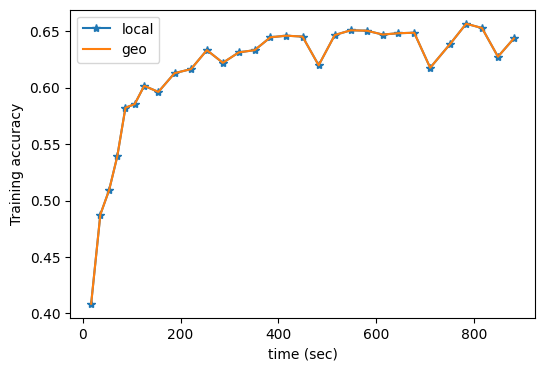

<Figure size 640x480 with 0 Axes>

In [86]:
pl.figure(figsize = (6,4))
pl.plot(results_local[:,1], results[:,0], '-*', label = 'local')
pl.plot(results_geo[:,1], results[:,0], '-', label = 'geo')
pl.legend()
pl.ylabel('Training accuracy')

pl.xlabel('time (sec)')
pl.show()
pl.clf()